In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [27]:
wasm_distributed_1 = pd.read_csv('one-at-a-time/one-invocation_wasm-distributed_1.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
wasm_distributed_10 = pd.read_csv('one-at-a-time/one-invocation_wasm-distributed_10.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
wasm_distributed_100 = pd.read_csv('one-at-a-time/one-invocation_wasm-distributed_100.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0 and processing_ms < 1500')

wasm_local_1 = pd.read_csv('one-at-a-time/one-invocation_wasm-local_1.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
wasm_local_10 = pd.read_csv('one-at-a-time/one-invocation_wasm-local_10.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
wasm_local_100 = pd.read_csv('one-at-a-time/one-invocation_wasm-local_100.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')

container_1 = pd.read_csv('one-at-a-time/one-invocation_container_1.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
container_10 = pd.read_csv('one-at-a-time/one-invocation_container_10.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')
container_100 = pd.read_csv('one-at-a-time/one-invocation_container_100.csv', sep=';').query('workflow_result=="succeeded" and processing_ms > 0')

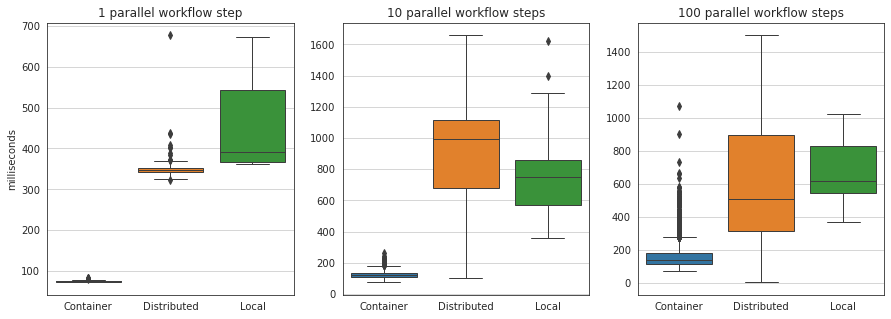

In [49]:
data_1 = pd.DataFrame({
    "Container": container_1['processing_ms'],
    "Distributed": wasm_distributed_1['processing_ms'],
    "Local": wasm_local_1['processing_ms'],    
})

data_10 = pd.DataFrame({
    "Container": container_10['processing_ms'],
    "Distributed": wasm_distributed_10['processing_ms'],
    "Local": wasm_local_10['processing_ms'],
})

data_100 = pd.DataFrame({
    "Container": container_100['processing_ms'],
    "Distributed": wasm_distributed_100['processing_ms'],
    "Local": wasm_local_100['processing_ms']
})

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
#fig.suptitle("Processing Time Per Image")
axs[0].set_title("1 parallel workflow step")
axs[0].set_ylabel("milliseconds")
axs[1].set_title("10 parallel workflow steps")
axs[2].set_title("100 parallel workflow steps")
sns.set_style("white")

axs[0].grid()
axs[1].grid()
axs[2].grid()

g = sns.boxplot(ax=axs[0], data=data_1, linewidth=1)
g = sns.boxplot(ax=axs[1], data=data_10, linewidth=1)
g = sns.boxplot(ax=axs[2], data=data_100, linewidth=1)

In [50]:
fig.savefig("one-invocation.pdf")